In [77]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import scipy.stats as st

In [72]:
# import .csv
csv_path = "wine_data.csv"
wine_df = pd.read_csv(csv_path, low_memory=False)
wine_df

,Country,Points,Price,Province,Region,Variety
0,US,96,235.0,California,Napa Valley,Cabernet Sauvignon
1,US,96,90.0,California,Knights Valley,Sauvignon Blanc
2,US,96,65.0,Oregon,Willamette Valley,Pinot Noir
3,US,95,65.0,Oregon,Chehalem Mountains,Pinot Noir
4,US,95,60.0,California,Sonoma Coast,Pinot Noir
...,...,...,...,...,...,...
134423,South Africa,83,15.0,Stellenbosch,NaN,Pinotage
134424,South Africa,83,16.0,Stellenbosch,NaN,White Blend
134425,South Africa,82,15.0,Coastal Region,NaN,Merlot
134426,South Africa,82,14.0,Paarl,NaN,Merlot


In [21]:
variety_path = "variety_data.csv"
variety_df = pd.read_csv(variety_path, low_memory=False)
variety_df

,Country,Points,Price,Province,Region,Variety
0,US,95,90.0,Oregon,Willamette Valley,Chardonnay
1,US,95,60.0,California,Edna Valley,Chardonnay
2,US,90,37.0,California,Russian River Valley,Chardonnay
3,US,90,42.0,Washington,Columbia Valley (WA),Chardonnay
4,US,90,18.0,California,Russian River Valley,Chardonnay
...,...,...,...,...,...,...
106390,South Africa,89,30.0,Paarl,NaN,Viognier
106391,South Africa,88,19.0,Coastal Region,NaN,Viognier
106392,South Africa,88,14.0,Coastal Region,NaN,Viognier
106393,South Africa,87,20.0,Coastal Region,NaN,Viognier


In [4]:
# jeanaej's code starts here

## By Country

In [6]:
# Get the countries
countries = wine_df["Country"].unique()
countries = sorted(countries)
countries

['Argentina',
 'Australia',
 'Austria',
 'Chile',
 'France',
 'Germany',
 'Italy',
 'New Zealand',
 'Portugal',
 'South Africa',
 'Spain',
 'US']

In [7]:
# Grouping by country
country_group = wine_df.groupby(["Country"])

# Getting the mean of points and price
points_c_mean = country_group["Points"].mean()
price_c_mean = country_group["Price"].mean()

# Getting the median of points and price
points_c_median = country_group["Points"].median()
price_c_median = country_group["Price"].median()

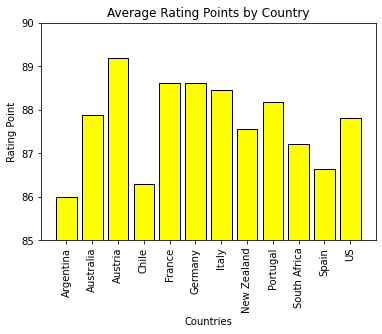

In [47]:
# Creating a bar graph Average rating by country
plt.bar(countries, points_c_mean, align = "center", color = "yellow", edgecolor ="black")

# Labeling graphs
plt.title("Average Rating Points by Country")
plt.xlabel("Countries")
plt.ylabel("Rating Point")
plt.xticks(rotation = 90)

# Making the y-values start at 80 to 90 because the range of the rating points began at 85. 
# Note: There is a payment threshold to get a wine rated; therefore, the rating points begin at 85.
plt.ylim(85, 90)
plt.show()

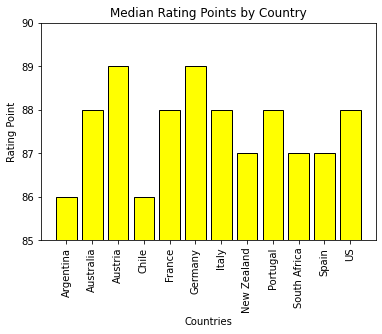

In [48]:
# Creating a bar graph Median rating by country
plt.bar(countries, points_c_median, align = "center", color = "yellow", edgecolor ="black")

# Labeling graphs
plt.title("Median Rating Points by Country")
plt.xlabel("Countries")
plt.ylabel("Rating Point")
plt.xticks(rotation = 90)

# Making the y-values start at 80 to 90 because the range of the rating points began at 85. 
# Note: There is a payment threshold to get a wine rated; therefore, the rating points begin at 85.
plt.ylim(85, 90)
plt.show()

Difference between Average and Median.

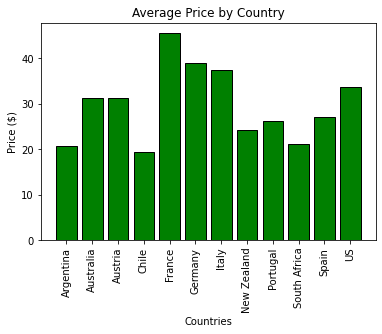

In [45]:
# Creating a bar graph Average Price by country
plt.bar(countries, price_c_mean, align = "center", color = "green", edgecolor ="black")

# Labeling the graph
plt.title("Average Price by Country")
plt.xlabel("Countries")
plt.ylabel("Price ($)")
plt.xticks(rotation = 90)
plt.show()

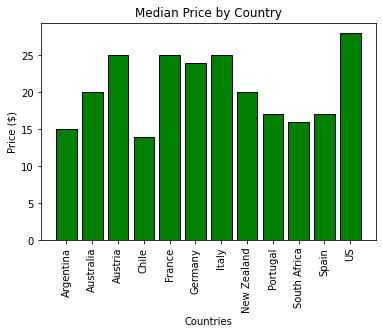

In [46]:
# Creating a bar graph Median Price by country
plt.bar(countries, price_c_median, align = "center", color = "green", edgecolor ="black")

# Labeling the graph
plt.title("Median Price by Country")
plt.xlabel("Countries")
plt.ylabel("Price ($)")
plt.xticks(rotation = 90)
plt.show()

Difference between Average and Median.

## By Variety

In [34]:
# Getting the varieties
var1ieties = wine_df["Variety"].unique()
varieties = sorted(varieties)
varieties

['Aglianico',
 'Airen',
 'Albana',
 'Albariño',
 'Albarossa',
 'Albarín',
 'Aleatico',
 'Alfrocheiro',
 'Alicante',
 'Alicante Bouschet',
 'Aligoté',
 'Alsace white blend',
 'Altesse',
 'Alvarelhão',
 'Alvarinho',
 'Alvarinho-Chardonnay',
 'Angevine',
 'Ansonica',
 'Antão Vaz',
 'Apple',
 'Aragonez',
 'Aragonês',
 'Arinto',
 'Arneis',
 'Austrian Red Blend',
 'Austrian white blend',
 'Auxerrois',
 'Avesso',
 'Azal',
 'Baco Noir',
 'Baga',
 'Baga-Touriga Nacional',
 'Barbera',
 'Bastardo',
 'Bical',
 'Black Monukka',
 'Black Muscat',
 'Blauburgunder',
 'Blauer Portugieser',
 'Blaufränkisch',
 'Bobal',
 'Bombino Bianco',
 'Bonarda',
 'Bordeaux-style Red Blend',
 'Bordeaux-style White Blend',
 'Bovale',
 'Brachetto',
 'Braucol',
 'Bual',
 'Bukettraube',
 'Cabernet',
 'Cabernet Blend',
 'Cabernet Franc',
 'Cabernet Franc-Cabernet Sauvignon',
 'Cabernet Franc-Carmenère',
 'Cabernet Franc-Malbec',
 'Cabernet Franc-Merlot',
 'Cabernet Franc-Tempranillo',
 'Cabernet Merlot',
 'Cabernet Pfeffer'

In [57]:
# Grouping by varieties
wine_variety_group = wine_df.groupby(["Variety"])

# Getting the mean of points and price
points_wv_mean = variety_group["Points"].mean()
price_wv_mean = variety_group["Price"].mean()

# Getting the median of points and price
points_wv_median = variety_group["Points"].median()
price_wv_median = variety_group["Price"].median()

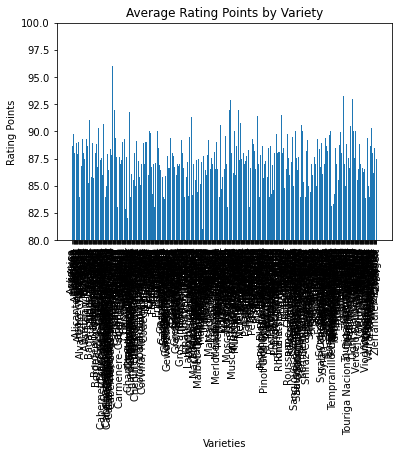

In [58]:
# Creating a bar graph Average points by varietal
plt.bar(varieties, points_wv_mean, align = "center")

# Labeling the graph
plt.title("Average Rating Points by Variety")
plt.xlabel("Varieties")
plt.ylabel("Rating Points")
plt.xticks(rotation = 90)

# Making the y-values start at 80 to 90 because the range of the rating points began at 80. 
# Note: There is a payment threshold to get a wine rated; therefore, the rating points begin at 80.
plt.ylim(80,100)
plt.show()

There are 545 different varieties within the cleaned wine data set. In order to further analyze the price and rating points of wine varieties, we created another data set with the 25 top ranked varieties.

In [40]:
# Getting the Top 25 Variety names
top_varieties = variety_df["Variety"].unique()
top_varieties = sorted(top_varieties)
top_varieties

['Bordeaux-style Red Blend',
 'Cabernet Franc',
 'Cabernet Sauvignon',
 'Chardonnay',
 'Corvina, Rondinella, Molinara',
 'Malbec',
 'Merlot',
 'Nebbiolo',
 'Pinot Grigio',
 'Pinot Gris',
 'Pinot Noir',
 'Portuguese Red',
 'Red Blend',
 'Rhône-style Red Blend',
 'Riesling',
 'Rosé',
 'Sangiovese',
 'Sauvignon Blanc',
 'Shiraz',
 'Sparkling Blend',
 'Syrah',
 'Tempranillo',
 'Viognier',
 'White Blend',
 'Zinfandel']

In [41]:
# Grouping by varieties
varieties_group = variety_df.groupby(["Variety"])

# Getting the mean of points and price
points_v_mean = varieties_group["Points"].mean()
price_v_mean = varieties_group["Price"].mean()

# Getting the median of points and price
points_v_median = varieties_group["Points"].median()
price_v_median = varieties_group["Price"].median()

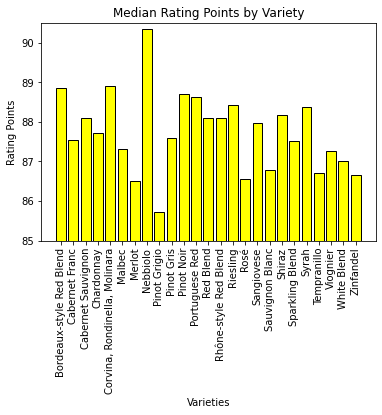

In [65]:
# Creating a bar graph Median points by varietal
plt.bar(top_varieties, points_v_mean, align = "center", color = "yellow", edgecolor ="black")

# Labeling the graph
plt.title("Median Rating Points by Variety")
plt.xlabel("Varieties")
plt.ylabel("Rating Points")
plt.xticks(rotation = 90)

# Making the y-values start at 80 to 90 because the range of the rating points began at 85. 
# Note: There is a payment threshold to get a wine rated; therefore, the rating points begin at 85.
plt.ylim(85, 90.5)
plt.show()

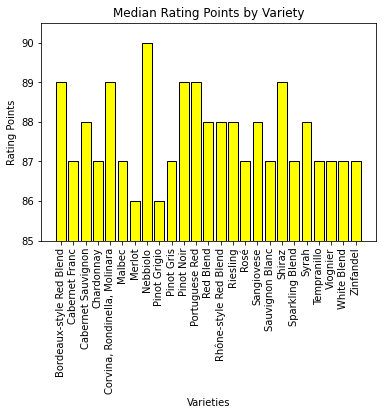

In [67]:
# Creating a bar graph Median points by varietal
plt.bar(top_varieties, points_v_median, align = "center", color = "yellow", edgecolor ="black")

# Labeling the graph
plt.title("Median Rating Points by Variety")
plt.xlabel("Varieties")
plt.ylabel("Rating Points")
plt.xticks(rotation = 90)

# Making the y-values start at 80 to 90 because the range of the rating points began at 85. 
# Note: There is a payment threshold to get a wine rated; therefore, the rating points begin at 85.
plt.ylim(85, 90.5)
plt.show()

Difference between Average and Median

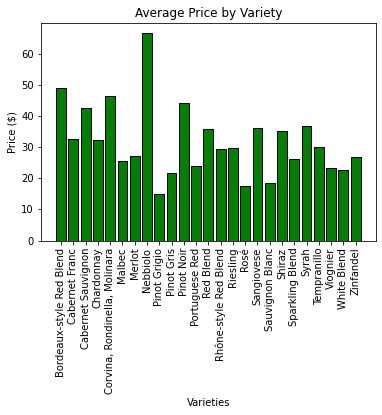

In [62]:
# Creating a bar graph Average Price by varietal
plt.bar(top_varieties, price_v_mean, align = "center",color = "green", edgecolor ="black")

# Labeling the graph
plt.title("Average Price by Variety")
plt.xlabel("Varieties")
plt.ylabel("Price ($)")
plt.xticks(rotation = 90)
plt.show()

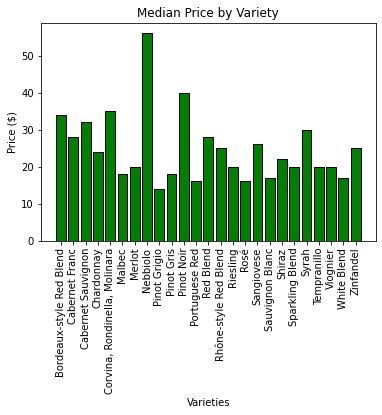

In [64]:
# Creating a bar graph Median Price by varietal
plt.bar(top_varieties, price_v_median, align = "center", color = "green", edgecolor ="black")

# Labeling the graph
plt.title("Median Price by Variety")
plt.xlabel("Varieties")
plt.ylabel("Price ($)")
plt.xticks(rotation = 90)
plt.show()

Difference between Average and Median

## Wines Below $25

In [74]:
# Create a new dataframe with economical priced wine
low_price = 25
low_price_df = wine_df.loc[wine_df["Price"] <= low_price]
low_price_df

,Country,Points,Price,Province,Region,Variety
11,US,95,24.0,California,Napa Valley,Rosé
23,US,90,18.0,California,Russian River Valley,Chardonnay
25,US,90,25.0,New York,Finger Lakes,Riesling
33,US,91,19.0,Oregon,Willamette Valley,Pinot Gris
38,US,91,22.0,California,Napa Valley,Cabernet Sauvignon
...,...,...,...,...,...,...
134423,South Africa,83,15.0,Stellenbosch,NaN,Pinotage
134424,South Africa,83,16.0,Stellenbosch,NaN,White Blend
134425,South Africa,82,15.0,Coastal Region,NaN,Merlot
134426,South Africa,82,14.0,Paarl,NaN,Merlot


In [115]:
# Get the Price and Points of Economical Wines
lp_price = low_price_df["Price"]
lp_points = low_price_df["Points"]

### Rating Points by Price

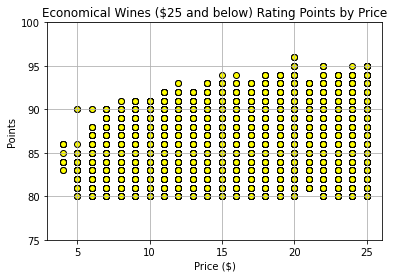

In [118]:
# Generate a scatter plot 
plt.scatter(lp_price, lp_points, color = "yellow", edgecolor = "black")

# Labeling the graph
plt.title(f"Economical Wines (${low_price} and below) Rating Points by Price")
plt.xlabel("Price ($)")
plt.ylabel("Points")

plt.ylim(75,100)
plt.grid(True)

plt.show()

In [119]:
# Calculate the correlation coefficient
r = st.pearsonr(lp_price, lp_points)
r = r[0]**2

print(f'The correlation coefficient of price and rating points for economical wines {round(r,2)}\n')

# Calculate the linear regression model 

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lp_price, lp_points)
regress_values = lp_price * slope + intercept
line_eq = f' y = {round(slope,2)} x + {round(intercept,2)}'

print(line_eq)

The correlation coefficient of price and rating points for economical wines 0.14

 y = 0.19 x + 83.24


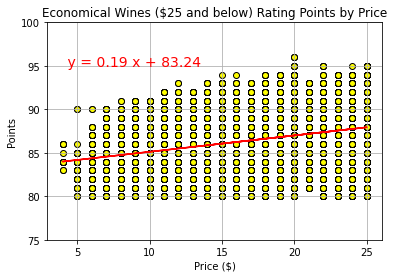

In [120]:
# Generate a scatter plot of the average tumor volume vs. mouse weight
# with the linear regression line and equation

plt.plot(lp_price,regress_values, "r-")
plt.scatter(lp_price, lp_points, color = "yellow", edgecolor = "black")

# Labeling the graph with the Linear Regression
plt.title(f"Economical Wines (${low_price} and below) Rating Points by Price")
plt.xlabel("Price ($)")
plt.ylabel("Points")

plt.ylim(75,100)
plt.grid(True)
plt.annotate(line_eq, (4,95), fontsize = 14, color ="r")

plt.show()

### Price by Rating Points

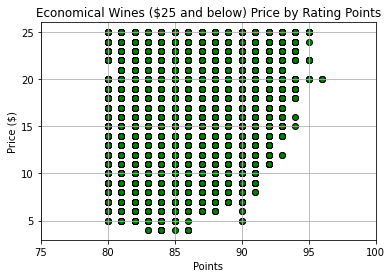

In [129]:
# Generate a scatter plot 
plt.scatter(lp_points, lp_price, color = "green", edgecolor = "black")

# Labeling the graph
plt.title(f"Economical Wines (${low_price} and below) Price by Rating Points")
plt.xlabel("Points")
plt.ylabel("Price ($)")

plt.xlim(75,100)
plt.grid(True)

plt.show()

In [130]:
# Calculate the correlation coefficient
r = st.pearsonr(lp_points, lp_price)
r = r[0]**2

print(f'The correlation coefficient of price and rating points for economical wines {round(r,2)}\n')

# Calculate the linear regression model 

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lp_points, lp_price)
regress_values = lp_points * slope + intercept
line_eq = f' y = {round(slope,2)} x + {round(intercept,2)}'

print(line_eq)

The correlation coefficient of price and rating points for economical wines 0.14

 y = 0.72 x + -45.64


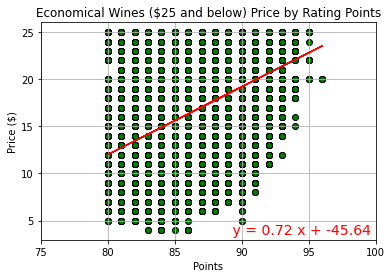

In [143]:
# Generate a scatter plot of the average tumor volume vs. mouse weight
# with the linear regression line and equation

plt.plot(lp_points,regress_values, "r-")
plt.scatter(lp_points, lp_price, color = "green", edgecolor = "black")

# Labeling the graph with the Linear Regression
plt.title(f"Economical Wines (${low_price} and below) Price by Rating Points")
plt.xlabel("Points")
plt.ylabel("Price ($)")

plt.xlim(75,100)
plt.grid(True)
plt.annotate(line_eq, (89,3.5), fontsize = 14, color ="r")

plt.show()

## Wines Above $40

In [121]:
high_price = 50
high_price_df = wine_df.loc[wine_df["Price"] >= high_price]
high_price_df

,Country,Points,Price,Province,Region,Variety
0,US,96,235.0,California,Napa Valley,Cabernet Sauvignon
1,US,96,90.0,California,Knights Valley,Sauvignon Blanc
2,US,96,65.0,Oregon,Willamette Valley,Pinot Noir
3,US,95,65.0,Oregon,Chehalem Mountains,Pinot Noir
4,US,95,60.0,California,Sonoma Coast,Pinot Noir
...,...,...,...,...,...,...
134239,South Africa,90,66.0,Paarl,NaN,Shiraz
134263,South Africa,92,145.0,Stellenbosch,NaN,Cabernet Blend
134343,South Africa,87,69.0,Western Cape,NaN,Shiraz
134373,South Africa,91,68.0,Paarl,NaN,Shiraz


In [122]:
# Get the Price and Points of Expensive Wines
hp_price = high_price_df["Price"]
hp_points = high_price_df["Points"]

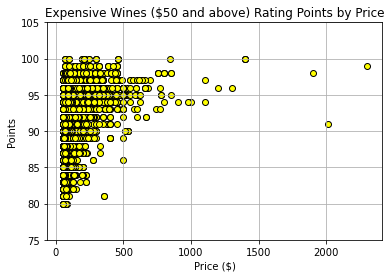

In [123]:
# Generate a scatter plot 
plt.scatter(hp_price, hp_points, color = "yellow", edgecolor = "black")

plt.title(f"Expensive Wines (${high_price} and above) Rating Points by Price")
plt.xlabel("Price ($)")
plt.ylabel("Points")

plt.ylim(75,105)
plt.grid(True)

plt.show()

In [148]:
# Calculate the correlation coefficient

r = st.pearsonr(hp_price, hp_points)
r = r[0]**2

print(f'The correlation coefficient of price and rating points for economical wines {round(r,2)}\n')

# Calculate the linear regression model 

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(hp_price, hp_points)
regress_values = hp_price * slope + intercept
line_eq = f' y = {round(slope,2)} x + {round(intercept,2)}'

print(line_eq)

The correlation coefficient of price and rating points for economical wines 0.08

 y = 0.01 x + 89.98


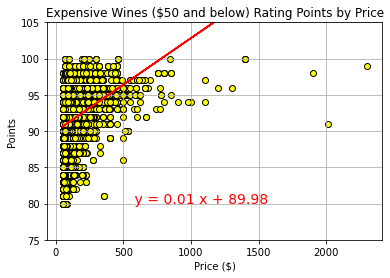

In [149]:
# Generate a scatter plot of the average tumor volume vs. mouse weight
# with the linear regression line and equation

plt.plot(hp_price,regress_values, "r-")
plt.scatter(hp_price, hp_points, color = "yellow", edgecolor = "black")

# Labeling the graph with the Linear Regression
plt.title(f"Expensive Wines (${high_price} and below) Rating Points by Price")
plt.xlabel("Price ($)")
plt.ylabel("Points")

plt.ylim(75,105)
plt.grid(True)
plt.annotate(line_eq, (550,80), fontsize = 14, color ="r")

plt.show()

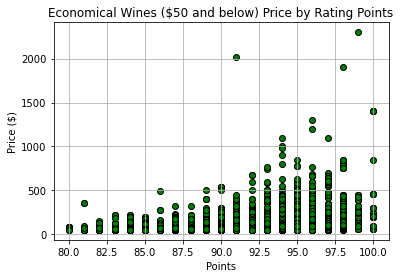

In [145]:
# Generate a scatter plot 
plt.scatter(hp_points, hp_price, color = "green", edgecolor = "black")

# Labeling the graph
plt.title(f"Economical Wines (${high_price} and below) Price by Rating Points")
plt.xlabel("Points")
plt.ylabel("Price ($)")

plt.xlim()
plt.grid(True)

plt.show()

In [150]:
# Calculate the correlation coefficient
r = st.pearsonr(hp_points, hp_price)
r = r[0]**2

print(f'The correlation coefficient of price and rating points for economical wines {round(r,2)}\n')

# Calculate the linear regression model 

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(hp_points, hp_price)
regress_values = hp_points * slope + intercept
line_eq = f' y = {round(slope,2)} x + {round(intercept,2)}'

print(line_eq)

The correlation coefficient of price and rating points for economical wines 0.08

 y = 6.52 x + -510.28


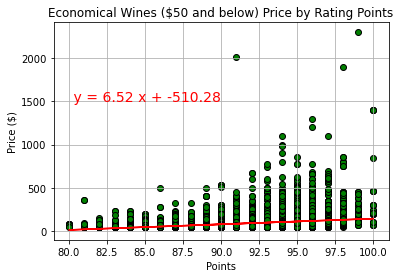

In [152]:
# Generate a scatter plot of the average tumor volume vs. mouse weight
# with the linear regression line and equation

plt.plot(hp_points,regress_values, "r-")
plt.scatter(hp_points, hp_price, color = "green", edgecolor = "black")

# Labeling the graph with the Linear Regression
plt.title(f"Economical Wines (${high_price} and below) Price by Rating Points")
plt.xlabel("Points")
plt.ylabel("Price ($)")

plt.xlim()
plt.grid(True)
plt.annotate(line_eq, (80,1500), fontsize = 14, color ="r")

plt.show()

## France vs Italy

In [ ]:
# jeannaej's code ends here

In [ ]:
# natalia's code starts here

In [ ]:
wine_df.nunique()

In [ ]:
US_only = wine_df.loc[wine_df["Country"] == "US"]
US_only

In [ ]:
us_var = US_only.groupby("Variety")
us_varieties = us_var.count()
us_varieties

In [ ]:
# Summing all varieties that will be lummped together
other = 0
for variety, row in us_varieties.iterrows():
    if row["Country"] < 1000:
        added = row["Country"]
        other = other + added
    else:
        pass
        
print(other)

In [ ]:
# Returns the top 40 varietals from US wineries
us_var_top = us_varieties.loc[us_varieties["Country"] >= 1000]

In [ ]:
us_var_top.head()

In [ ]:
us_var_top.loc["Other Wine (206 Varietals)"] = [12575,12575,12575,12575,12575]
us_var_top = us_var_top.sort_values(by="Country", ascending=False)
us_var_top

In [ ]:
# Labels for the sections of our pie chart
labels = us_var_top.index

# The values of each section of the pie chart
sizes = us_var_top["Country"]

# The colors of each section of the pie chart
# colors = ["red", "orange", "lightcoral", "lightskyblue"]

# Seperate the top 3 Varietals
explode = (0, 0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0)

In [ ]:
plt.pie(sizes, labels=labels, autopct="%1.1f%%", shadow=True, explode=explode, radius=2.5)
plt.show()

In [ ]:
province = US_only.groupby("Province").count().sort_values(by="Country", ascending=False)
province

In [ ]:
# Summing all varieties that will be lummped together
other_prov = 0
for prov, row in province.iterrows():
    if row["Country"] < 100:
        added_prov = row["Country"]
        other_prov = other_prov + added_prov
    else:
        pass
        
print(other_prov)

In [ ]:
# Returns the top wine producing provinces in the US
province_top = province.loc[province["Country"] >1000]
province_top

In [ ]:
province_top.loc["Other Provinces (469 Provinces)"] = [469,469,469,469,469]
province_top = province_top.sort_values(by="Country", ascending=False)
province_top

In [ ]:
# Labels for the sections of our pie chart
labels = province_top.index

# The values of each section of the pie chart
sizes = province_top["Country"]

# The colors of each section of the pie chart
# colors = ["red", "orange", "lightcoral", "lightskyblue"]

# Seperate the top 3 Varietals
explode = (0.1, 0, 0, 0, 0)

In [ ]:
plt.pie(sizes, labels=labels, autopct="%1.1f%%", shadow=True, explode=explode, startangle=90, radius=2.5)
plt.show()

In [ ]:
patches, text = plt.pie(sizes, shadow=True, explode=explode, startangle=90, radius=2.5)
    
plt.legend(patches, labels, loc="best", bbox_to_anchor=(-0.1,1.), fontsize=12)
plt.show()

# Avoiding overlapping labels
# https://stackoverflow.com/questions/23577505/how-to-avoid-overlapping-of-labels-autopct-in-a-matplotlib-pie-chart 
# Accessed 14 Feb 2021

In [ ]:
ratio_df = wine_df
ratio_df["Points:Price"] = ratio_df["Points"]/ratio_df["Price"]
ratio_df

In [ ]:
mean = ratio_df.groupby("Country").mean()
mean

In [ ]:
median = ratio_df.groupby("Country").median()
median

In [ ]:
mean_median = pd.merge(mean, median, left_index=True, right_index=True, suffixes=("_mean","_median"))
best = mean_median.sort_values(by="Points:Price_mean", ascending=False)

In [ ]:
x_axis_country = best.index
point_per = best["Points:Price_mean"]
plt.bar(x_axis_country, point_per, align="center")
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Points per Dollar")
plt.title("Average Points per Dollar")

plt.show()

In [ ]:
# natalia's code ends here

In [ ]:
# sharon's code starts here

In [ ]:
# sharon's code ends here